##IMPORT LIBRARIES AND DATASET

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import datasets, transforms
import numpy as np

In [ ]:
!unzip RockPaper.zip

unzip:  cannot find or open RockPaper.zip, RockPaper.zip.zip or RockPaper.zip.ZIP.


In [ ]:
train_dir = "/kaggle/input/rock-paper-scissors/train"
test_dir = "/kaggle/input/rock-paper-scissors/test"
val_dir = "/kaggle/input/rock-paper-scissors/valid"

##APPLY TRANSFORMS

In [ ]:
means, stds = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
    transforms.RandomAffine(0, shear=0.2),
    transforms.RandomAffine(0, scale=(0.8, 1.2)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.CenterCrop((224, 224)),
])
train_data = datasets.ImageFolder(root = train_dir,
                                 transform=image_transforms,
                                 target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform=image_transforms)

valid_data = datasets.ImageFolder(root = val_dir,
                                  transform=image_transforms)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

##VISUALIZE THE DATA

In [ ]:
image.shape

torch.Size([3, 224, 224])

In [ ]:
print(f"Train data:{len(train_data)}\nTest data: {len(test_data)}\nValidation Data: {len(valid_data)}")

Train data:2520
Test data: 33
Validation Data: 372


Text(0.5, 1.0, '0')

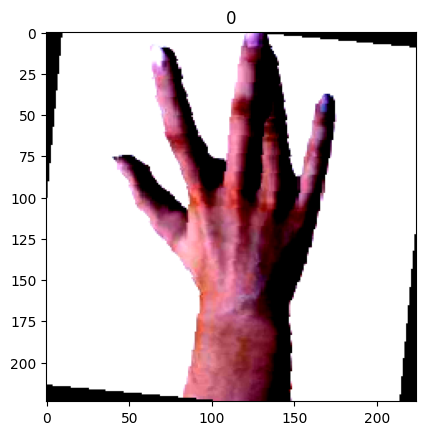

In [ ]:
image, label = train_data[0]
image = np.transpose(image, (1, 2, 0))
plt.imshow(image)
plt.title(label)

In [ ]:
class_names = train_data.classes
class_names

['paper', 'rock', 'scissors']

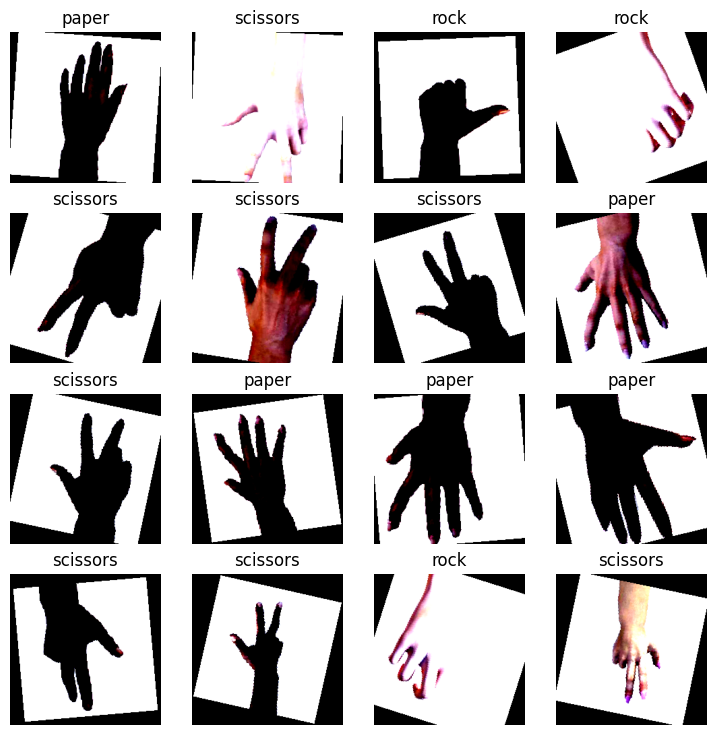

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(class_names[label])
    plt.axis(False);

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_dataloader = DataLoader(valid_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

print(f"Dataloaders: {train_dataloader, valid_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of validation dataloader: {len(valid_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a99e9d08430>, <torch.utils.data.dataloader.DataLoader object at 0x7a99e9d089d0>)
Length of train dataloader: 79 batches of 32
Length of validation dataloader: 12 batches of 32
Length of test dataloader: 2 batches of 32


In [ ]:
# Inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

##CUSTOM MODEL

In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.net = net = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size = 5, padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.4),

        nn.Conv2d(32,64,kernel_size=5, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.4),

        nn.Conv2d(64,64, kernel_size=5, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.4),

        nn.Flatten(),
        nn.Dropout(0.4),

        nn.Linear(64*26*26, 512),
        nn.ReLU(),
        nn.Dropout(0.4),

        nn.Linear(512, 3)
    )

  def forward(self, x):
    return self.net(x)

model = MyModel()

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 300, 300))
valid_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {valid_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{valid_image}")

Image batch shape: torch.Size([32, 3, 300, 300]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 300, 300]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  0.2539,  0.9364,  0.7122],
         [-0.0318,  0.1016,  1.3433,  ...,  0.3130,  0.8050, -1.1134],
         [ 0.4982, -1.2000,  0.1271,  ..., -0.3867,  0.9578, -0.8225],
         ...,
         [-1.7429, -1.2938, -0.6360,  ...,  1.2249,  0.6288,  0.9711],
         [ 0.0133,  0.0858,  1.2662,  ...,  0.5577,  0.6188,  0.9279],
         [ 0.4166,  1.5113, -0.9206,  ..., -0.3784,  0.5095,  1.1232]],

        [[-0.8472,  0.0580,  0.3687,  ..., -0.1233, -1.1663, -0.1329],
         [ 1.1337, -0.1207, -2.5940,  ..., -0.4396, -1.0556,  0.0393],
         [ 0.2506,  0.1506, -0.4333,  ...,  0.2672,  0.3675, -1.4014],
         ...,
         [ 0.1572, -0.1496,  1.6169,  ...,  0.7011, -0.8028,  2.1282],
         [ 1.6185, -0.4584,  0.9326,  ..., -0.4893, -0.1

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##VGG-16 MODEL

In [ ]:
import torch.nn as nn
from torchvision.models import vgg16

model_VGG = vgg16(pretrained=True)
for param in model_VGG.parameters():
    param.requires_grad = False

num_features = model_VGG.classifier[6].in_features
model_VGG.classifier[6] = nn.Linear(num_features, 4096)

model_VGG.classifier.add_module('fc1', nn.Linear(4096, 1024))
model_VGG.classifier.add_module('relu1', nn.ReLU(inplace=True))
model_VGG.classifier.add_module('fc2', nn.Linear(1024, 512))
model_VGG.classifier.add_module('relu2', nn.ReLU(inplace=True))

model_VGG.classifier.add_module('output', nn.Linear(512, 3))

print(model_VGG)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 146MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
custom_model = model.to(device)
vgg16_model = model_VGG.to(device)

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer_custom = torch.optim.Adam(custom_model.parameters(), lr=0.001)
optimizer_vgg16 = torch.optim.Adam(vgg16_model.parameters(), lr=0.001)

##SET UP TRAIN, VALIDATION AND TEST FUNCTIONS

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device) # pass the data to GPU
            optimizer.zero_grad()
            outputs = model(inputs) # forward pass
            loss = criterion(outputs, labels) # calculate loss
            loss.backward() # loss backward
            optimizer.step() # optimizer step

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_train_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Evaluate the model on the validation set
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss = running_val_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    return train_losses, train_accs, val_losses, val_accs

In [ ]:
def test_step(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        model.eval()
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    return test_accuracy

##TRAIN BOTH THE MODEL

In [ ]:
num_epochs = 10  # You can adjust the number of epochs
train_losses_custom, train_accs_custom, val_losses_custom, val_accs_custom = train_model(custom_model, train_dataloader, valid_dataloader, loss, optimizer_custom, num_epochs)
train_losses_vgg16, train_accs_vgg16, val_losses_vgg16, val_accs_vgg16 = train_model(vgg16_model, train_dataloader, valid_dataloader, loss, optimizer_vgg16, num_epochs)

Epoch [1/10], Train Loss: 2.3972, Train Acc: 51.15%, Val Loss: 3.7412, Val Acc: 34.68%
Epoch [2/10], Train Loss: 0.6531, Train Acc: 72.38%, Val Loss: 2.4325, Val Acc: 45.16%
Epoch [3/10], Train Loss: 0.4607, Train Acc: 81.90%, Val Loss: 4.3147, Val Acc: 48.66%
Epoch [4/10], Train Loss: 0.3313, Train Acc: 87.98%, Val Loss: 4.5986, Val Acc: 51.08%
Epoch [5/10], Train Loss: 0.3006, Train Acc: 89.37%, Val Loss: 7.3056, Val Acc: 44.89%
Epoch [6/10], Train Loss: 0.2591, Train Acc: 90.28%, Val Loss: 3.0139, Val Acc: 55.11%
Epoch [7/10], Train Loss: 0.2166, Train Acc: 92.34%, Val Loss: 28.9697, Val Acc: 40.32%
Epoch [8/10], Train Loss: 0.1938, Train Acc: 93.77%, Val Loss: 4.5387, Val Acc: 48.39%
Epoch [9/10], Train Loss: 0.1788, Train Acc: 94.33%, Val Loss: 7.8593, Val Acc: 45.16%
Epoch [10/10], Train Loss: 0.1602, Train Acc: 95.04%, Val Loss: 3.2834, Val Acc: 54.03%
Epoch [1/10], Train Loss: 0.5402, Train Acc: 77.78%, Val Loss: 0.5255, Val Acc: 80.91%
Epoch [2/10], Train Loss: 0.3085, Train A

##TEST THE MODELS

In [ ]:
test_acc_custom = test_step(custom_model, test_dataloader)
test_acc_vgg16 = test_step(vgg16_model, test_dataloader)
print(f"Test Accuracy of custom model: {test_acc_custom}")
print(f"Test accuracy of VGG16: {test_acc_vgg16}")

Test Accuracy of custom model: 75.75757575757575
Test accuracy of VGG16: 84.84848484848484


##PLOTTING THE RESULTS

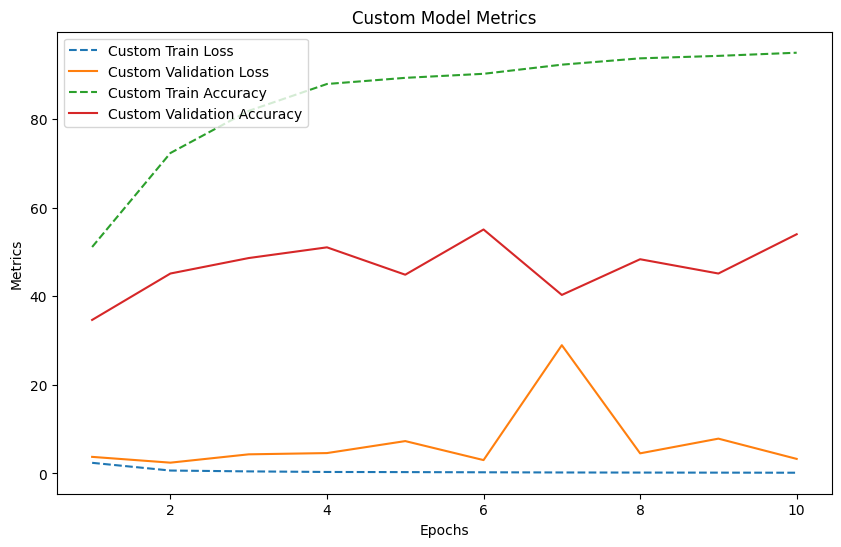

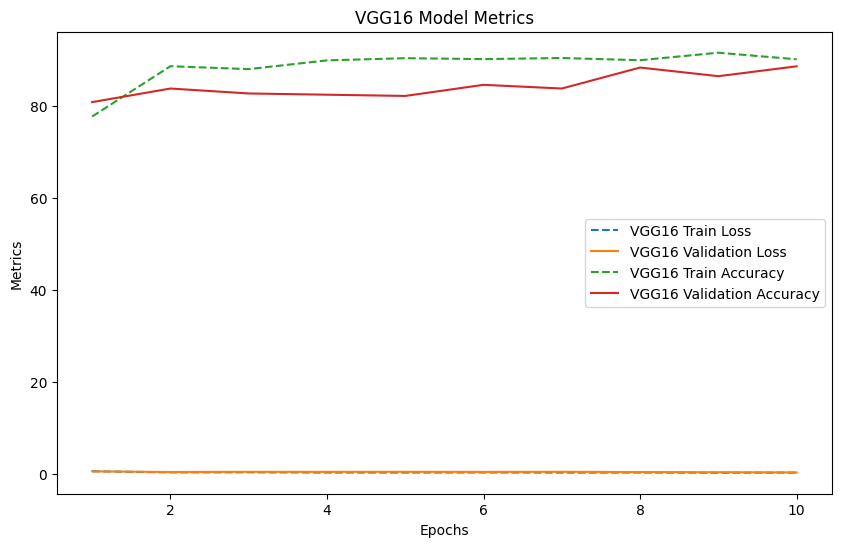

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(train_losses, train_accs, val_losses, val_accs, model_name):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_losses, label=f'{model_name} Train Loss', linestyle='--')
    plt.plot(epochs, val_losses, label=f'{model_name} Validation Loss')

    plt.plot(epochs, train_accs, label=f'{model_name} Train Accuracy', linestyle='--')
    plt.plot(epochs, val_accs, label=f'{model_name} Validation Accuracy')

    plt.title(f'{model_name} Model Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()
    plt.grid(False)
    plt.show()

plot_metrics(train_losses_custom, train_accs_custom, val_losses_custom, val_accs_custom, 'Custom')
plot_metrics(train_losses_vgg16, train_accs_vgg16, val_losses_vgg16, val_accs_vgg16, 'VGG16')
